# Домашняя работа "Оценка точности модели, переобучение, регуляризация"

- Посчитать tpr и fpr в ноутбуке с лекции. Убедиться, что график ROC AUC получается таким же, как и штатными средствами

- Построить график Precision - Recall на этих же данных

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

In [2]:
def binary_logistic_predict(y_proba, thresh=0.5):
    """ Функция для двоичной классификации на основе вероятностей принадлежности к классу 1.
    
    Параметры
    ---------
    y_proba : array
      Список вероятностей принадлежности к классу 1
    thresh : float
      Порог классификации, все вероятности выше порога будут относиться к классу 1
      
    Результат
    ---------
    y_binary : array
      Список категорий для y_proba, список содержит либо 1, либо 0
    """
    y_proba = np.array(y_proba)
    y_binary = np.where(y_proba > thresh, 1, 0)
    
    return y_binary


def calculate_roc_curve(y_proba, y):
    """ Функция для расчета TRP и FRP функции ошибок ROC двоичного классификатора
    для разных порогов классификации
    
    Параметры
    ---------
    y_proba : array
      Список вероятностей принадлежности к классу 1
    y : array
      Список бинарных категорий
      
    Результат
    ---------
    tpr, frp : tuple
      Значния TRP и FRP для разных порогов классификации
    """
    
    thresh_values = np.linspace(0, 1, 1000)
    
    tpr = []
    frp = []
    
    for thresh_value in thresh_values:
        tp_value = 0
        fp_value = 0
        tn_value = 0
        fn_value = 0
        y_predict_binary = binary_logistic_predict(y_proba=y_proba, thresh=thresh_value)
        
        for y_predict, y_real in zip(y_predict_binary, y):
            
            if y_predict == 1:
                
                if y_real == 1:
                    tp_value += 1
                else:
                    fp_value += 1 
                    
            elif y_predict == 0:
                
                if y_real == 0:
                    tn_value += 1  
                else:
                    fn_value += 1  
        
        tpr.append(tp_value / np.clip(tp_value + fn_value, 1e-12, np.inf))
        frp.append(fp_value / np.clip(fp_value + tn_value, 1e-12, np.inf))    
        
    return frp, tpr


def calculate_precision_recal_curve(y_proba, y):
    """ Функция для расчета precision и recal двоичного классификатора для разных порогов классификации
    
    Параметры
    ---------
    y_proba : array
      Список вероятностей принадлежности к классу 1
    y : array
      Список бинарных категорий
      
    Результат
    ---------
    precision, recal : tuple
      Значния precision и recal для разных порогов классификации
    """
    
    thresh_values = np.linspace(0, 1, 1000)
    
    precision = []
    recall = []
    
    for thresh_value in thresh_values:
        tp_value = 0
        fp_value = 0
        tn_value = 0
        fn_value = 0
        y_predict_binary = binary_logistic_predict(y_proba=y_proba, thresh=thresh_value)
        
        for y_predict, y_real in zip(y_predict_binary, y):
            
            if y_predict == 1:
                
                if y_real == 1:
                    tp_value += 1
                else:
                    fp_value += 1 
                    
            elif y_predict == 0:
                
                if y_real == 0:
                    tn_value += 1  
                else:
                    fn_value += 1  
        
        precision.append(tp_value / np.clip(tp_value + fp_value, 1e-12, np.inf))
        recall.append(tp_value / np.clip(tp_value + fn_value, 1e-12, np.inf))    
        
    return precision, recall

In [3]:
data = pd.read_csv('affair_data.csv')
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [4]:
X = data[data.columns.drop('affair')]
y = data['affair']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [5]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_proba = lr.predict_proba(X_test)[:, 1]
frp, tpr = calculate_roc_curve(y_proba=y_proba, y=y_test)

frp_sk, tpr_sk, thresh_sk = roc_curve(y_true=y_test, y_score=y_proba)

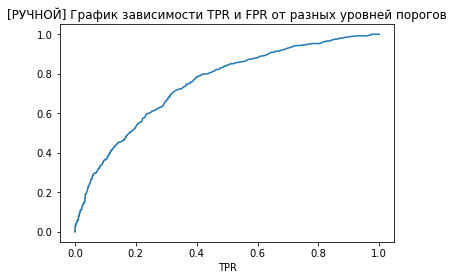

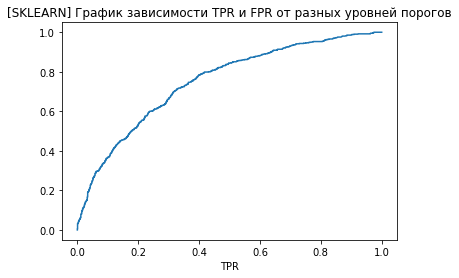

In [6]:
plt.plot(frp, tpr)
plt.title('[РУЧНОЙ] График зависимости TPR и FPR от разных уровней порогов')
plt.xlabel('FPR')
plt.xlabel('TPR')
plt.show()

plt.plot(frp_sk, tpr_sk)
plt.title('[SKLEARN] График зависимости TPR и FPR от разных уровней порогов')
plt.xlabel('FPR')
plt.xlabel('TPR')
plt.show()

In [7]:
precision, recall = calculate_precision_recal_curve(y_proba=y_proba, y=y_test)
precision_sk, recall_sk, thresh_sk = precision_recall_curve(y_true=y_test, probas_pred=y_proba)

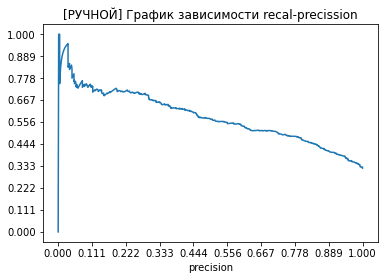

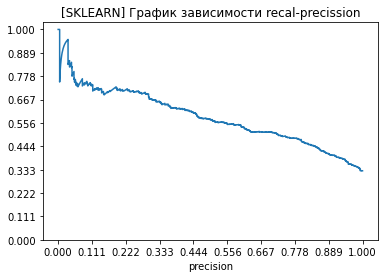

In [8]:
plt.plot(recall, precision)
plt.title('[РУЧНОЙ] График зависимости recal-precission')
plt.xlabel('recall')
plt.xlabel('precision')
plt.xticks(np.linspace(0, 1, 10))
plt.yticks(np.linspace(0, 1, 10))
plt.show()

plt.plot(recall_sk, precision_sk)
plt.title('[SKLEARN] График зависимости recal-precission')
plt.xlabel('recall')
plt.xlabel('precision')
plt.xticks(np.linspace(0, 1, 10))
plt.yticks(np.linspace(0, 1, 10))
plt.show()